In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving concrete_data.csv to concrete_data.csv


{'concrete_data.csv': b'Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength\r\n540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1040.0 ,676.0 ,28 ,79.99 \r\n540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1055.0 ,676.0 ,28 ,61.89 \r\n332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,270 ,40.27 \r\n332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,41.05 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,360 ,44.30 \r\n266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,90 ,47.03 \r\n380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,43.70 \r\n380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,36.45 \r\n266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,28 ,45.85 \r\n475.0 ,0.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,39.29 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,90 ,38.07 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,28 ,28.02 \r\n427.5 ,47.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,270 ,43.01 \r\n190.0 ,190.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,90 ,42.33 \r\n304.0 ,76.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,28 

In [ ]:
df=pd.read_csv("concrete_data.csv")
df.head

<bound method NDFrame.head of       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1

In [ ]:
correlation=df.corr()
print("correlation", correlation)

correlation                       Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275216 -0.397467 -0.081587   
Blast Furnace Slag -0.275216            1.000000 -0.323580  0.107252   
Fly Ash            -0.397467           -0.323580  1.000000 -0.256984   
Water              -0.081587            0.107252 -0.256984  1.000000   
Superplasticizer    0.092386            0.043270  0.377503 -0.657533   
Coarse Aggregate   -0.109349           -0.283999 -0.009961 -0.182294   
Fine Aggregate     -0.222718           -0.281603  0.079108 -0.450661   
Age                 0.081946           -0.044246 -0.154371  0.277618   
Strength            0.497832            0.134829 -0.105755 -0.289633   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092386         -0.109349       -0.222718   
Blast Furnace Slag          0.043270         -0.283999       -0.281603   
Fly Ash                     0.377503         

In [ ]:
df.shape

(1030, 9)

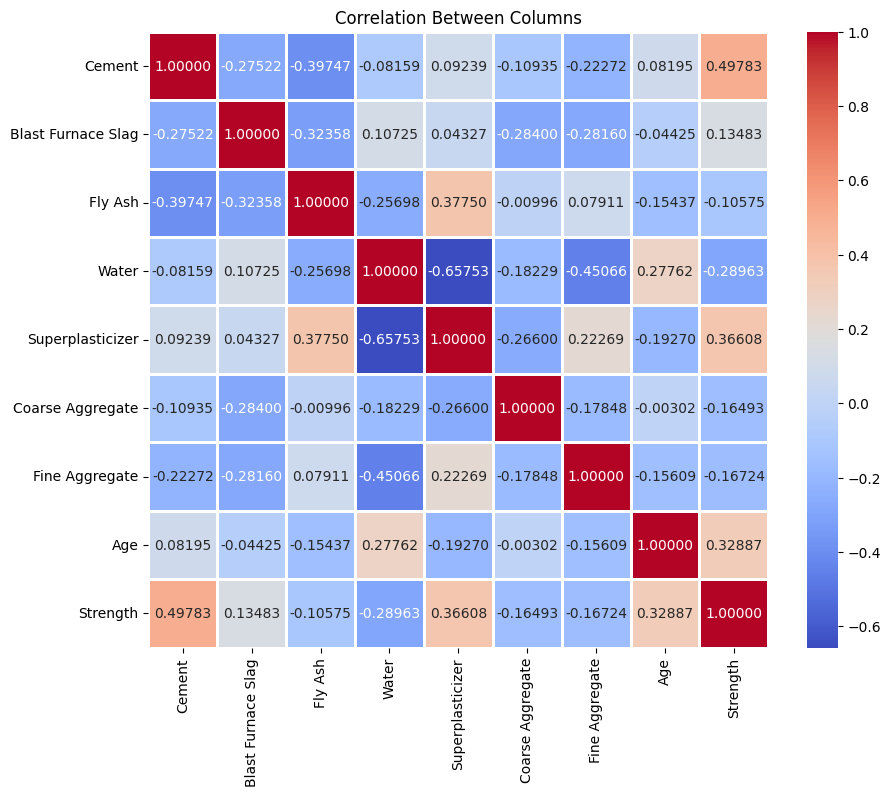

In [ ]:
#here we plot the correlation of each column with respect to each other
#in order to understand which feature has a significant effect on strength
#we should consider the features with correlation >0.5 and <-0.5


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".5f", linewidths=1)
plt.title('Correlation Between Columns')
plt.show()

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#here we check if the values in the table are null
#if it is null true will be printed in place of the value else false

df.isnull()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [ ]:
#here we sum all the true values of each feature to check whether there are any null values

df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
#now we divide the features and target variable

X=df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
y=df['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler
X=StandardScaler().fit_transform(X)
X

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [ ]:
n_cols=X.shape[1]
n_cols

8

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#The comma after n_cols in input_shape=(n_cols,) is used to create a tuple. In Python, a tuple with a single element requires a trailing comma

def regression_model():

  model=Sequential()
  model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer='adam',loss='mean_squared_error')

  return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print("training set", X_train.shape,y_train.shape)
print("testing set", X_test.shape,y_test.shape)

training set (824, 8) (824,)
testing set (206, 8) (206,)


In [ ]:
model = regression_model()

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
18/18 - 1s - loss: 1520.3296 - val_loss: 1412.3706 - 1s/epoch - 68ms/step
Epoch 2/100
18/18 - 0s - loss: 1414.8474 - val_loss: 1292.4454 - 111ms/epoch - 6ms/step
Epoch 3/100
18/18 - 0s - loss: 1272.1445 - val_loss: 1123.5615 - 120ms/epoch - 7ms/step
Epoch 4/100
18/18 - 0s - loss: 1074.3870 - val_loss: 906.7330 - 125ms/epoch - 7ms/step
Epoch 5/100
18/18 - 0s - loss: 839.6232 - val_loss: 668.0475 - 115ms/epoch - 6ms/step
Epoch 6/100
18/18 - 0s - loss: 598.9351 - val_loss: 459.7845 - 141ms/epoch - 8ms/step
Epoch 7/100
18/18 - 0s - loss: 405.3983 - val_loss: 318.1835 - 123ms/epoch - 7ms/step
Epoch 8/100
18/18 - 0s - loss: 290.4389 - val_loss: 247.1310 - 165ms/epoch - 9ms/step
Epoch 9/100
18/18 - 0s - loss: 236.3348 - val_loss: 219.2857 - 101ms/epoch - 6ms/step
Epoch 10/100
18/18 - 0s - loss: 216.0475 - val_loss: 207.0787 - 77ms/epoch - 4ms/step
Epoch 11/100
18/18 - 0s - loss: 206.3591 - val_loss: 199.4026 - 92ms/epoch - 5ms/step
Epoch 12/100
18/18 - 0s - loss: 196.4035 - val_lo

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

7/7 [==============================] - 0s 2ms/step - loss: 59.2067
Test Loss: 59.2067


In [ ]:
#FOR LEARNING

#we can use the model.predict() to use with new values and dataset
#To avoid overfitting, practitioners often use techniques like early stopping,
#where training is stopped when the performance on the validation set starts to degrade,
#even if the training loss continues to decrease.

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
#history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2, callbacks=[early_stopping])